# Chapter 6: Regression

In this notebook we will see how regression analysis can help to understand the data behavior, to predict data values
(continuous or discrete), and to find important predictors (sparse models).
We present four different regression models: Simple linear regression, Multiple linear regression, Polynomial regression and Logistic regression. 
We evaluate the analysis results **qualitatively** by means of Seaborn visualization tools and **quantitatively** by means Scikit-learn library which provides validation measures and other toolboxes.
We use present three practical cases using real data:
* Practical case 1: Sea Ice Extent and Climate Change
* Practical case 2: Prediction of the Price of a New Housing Data Market
* Practical case 3: Winning or Losing Football Team


In [1]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})


import matplotlib.pylab as plt
%matplotlib inline 
#plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex = True)
plt.rc('font', family = 'times')
plt.rc('xtick', labelsize = 10) 
plt.rc('ytick', labelsize = 10) 
plt.rc('font', size = 12) 
plt.rc('figure', figsize = (12, 5))

In [2]:
import numpy as np

## Simple and Multiple Linear Regression

The simplest model we can think of is the **linear model**, where the response $\textbf{y}$ depends linearly from the covariates $\textbf{x}_i$.

In the **simple** linear regression, with a single variable, we described the relationship between the predictor and the response with a straight line. The model is:
$$ \textbf{y}  =  a_0+ a_1 \textbf{x}_1 $$

The parameter $a_0$ is called the constant term or the *intercept*.

In the case of *multiple* linear regression we extend this idea by fitting a m-dimensional hyperplane to our m predictors.

$$ \textbf{y}  =  a_1 \textbf{x}_1  + \dots + a_m \textbf{x}_{m} $$

The $a_i$ are termed the *parameters* of the model or the coefficients.


**Example**: Does the insurance price depend on the driving experience?
Given the following information, the monthly auto insurance prices ($\textbf{y}$) and driving experiences in years ($\textbf{x}_{1}$) of a set of n subjects, we can build a linear model to answer this question.
We can also predict the monthly auto insurance price for a driver with 10 years of driving experience.



Let's generate a set of data to illsutrate simple linear regression

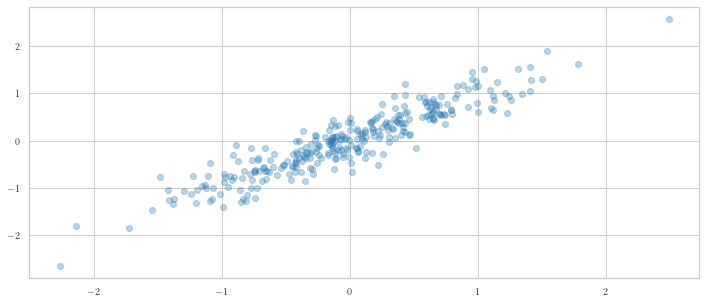

In [3]:
X1 = np.random.randn(300, 2)  # Random points sampled from a univariate “normal” (Gaussian) distribution
A = np.array([[0.6, .4], [.4, 0.6]])
X2 = np.dot(X1, A)
plt.plot(X2[:, 0], X2[:, 1], "o", alpha = 0.3) # alpha, blending value, between 0 (transparent) and 1 (opaque).

We can create a linear model to explain the data

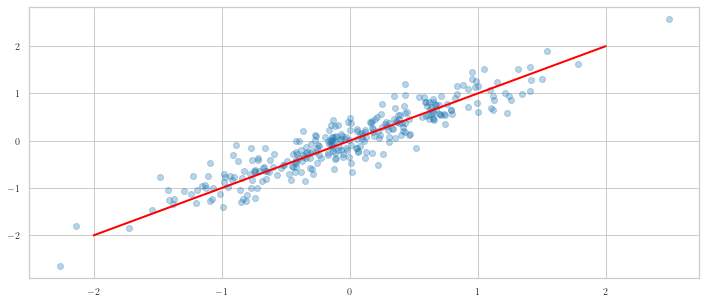

In [4]:
model = [0+1*x for x in np.arange(-2,3)]
plt.plot(X2[:, 0], X2[:, 1], "o", alpha = 0.3);
plt.plot(np.arange(-2,3), model, 'r');
plt.show()
# The red line gives the predicted values of this model

But there are other linear models. Which is the best model for a set of samples?

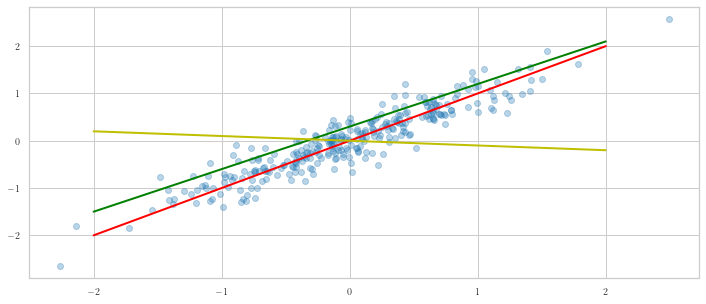

In [5]:
plt.plot(X2[:, 0], X2[:, 1], "o", alpha = 0.3);
# We can use several parameters and we do not know which is the best model
model1 = [0+1*x for x in np.arange(-2,3)]
model2 = [0.3+0.9*x for x in np.arange(-2,3)]
model3 = [0-0.1*x for x in np.arange(-2,3)]
plt.plot(np.arange(-2,3), model1, 'r')
plt.plot(np.arange(-2,3), model2, 'g')
plt.plot(np.arange(-2,3), model3, 'y')
plt.savefig("files/ch06/ExSimpleRegModels.png", dpi = 300, bbox_inches = 'tight')

### Ordinary Least Squares

Ordinary Least Squares (OLS) is the simplest and most common **estimator** in which the coefficients $a$'s 
of the simple linear regression: $\textbf{y} = a_0+a_1 \textbf{x}$, 
are chosen to minimize the **square of the distance between the predicted values and the actual values**. 

Given the set of samples $(\textbf{x},\textbf{y})$, the objective is to minimize:

$$ ||a_0 + a_1 \textbf{x} -  \textbf{y} ||^2_2 = \sum_{j=1}^n (a_0+a_1 x_{j} -  y_j )^2,$$ with respect to $a_0, a_1$.

This expression is often called **sum of squared errors of prediction (SSE)**.


### Practical case 1: Climate Change and Sea Ice Extent

We want to answer the question: Has there been a decrease in the amount of ice in the last years?

For that we will use the sea ice extent measurements from the [National Snow & Ice Data Center](https://nsidc.org/data/seaice\_index/archives.html).

We perform the following processing steps:

1) We must read and clean the data.
The file 'SeaIce.txt' is a ``Tab`` separated file containing:
    + Year:	4-digit year
    + mo:	1- or 2-digit month
    + data_type:	Input data set (Goddard/NRTSI-G)
    + region:	Hemisphere that this data covers (N: Northern; S: Southern)
    + extent:	Sea ice extent in millions of square km
    + area:	Sea ice area in millions of square km


In [6]:
# Load the data and show the info and contents:
import pandas as pd
ice = pd.read_csv('files/ch06/SeaIce.txt', delim_whitespace = True)
print('shape:', ice.shape)
ice.head() 

shape: (424, 6)


,year,mo,data_type,region,extent,area
0,1979,1,Goddard,N,15.54,12.33
1,1980,1,Goddard,N,14.96,11.85
2,1981,1,Goddard,N,15.03,11.82
3,1982,1,Goddard,N,15.26,12.11
4,1983,1,Goddard,N,15.10,11.92


To compute the anomaly for a given interval of time, we can compute the mean for that interval of time (using the period 1981 through 2010 for  the mean extend), before data cleaning.


In [7]:
ice.mean() 
# Observation: a negative mean?!!

year      1996.000000
mo           6.500000
extent     -35.443066
area       -37.921108
dtype: float64

We need to clean the data.

Text(0, 0.5, 'Extent')

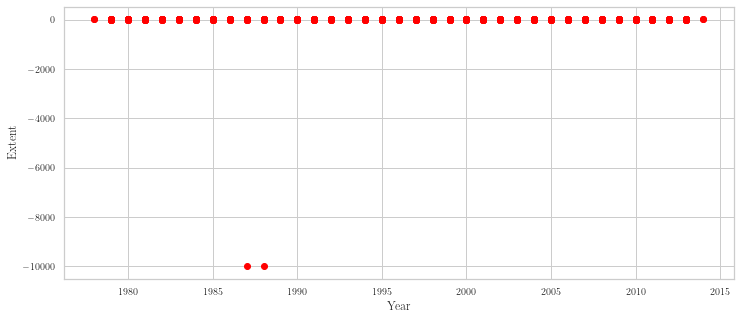

In [8]:
# Visualize the data
x = ice.year
y = ice.extent
plt.scatter(x, y, color = 'red')
plt.xlabel('Year')
plt.ylabel('Extent')

We detect some outlier or missing data.

In [9]:
print('Different values in data_type field:', np.unique(ice.data_type.values))   # there is a -9999 value!

Different values in data_type field: ['-9999' 'Goddard' 'NRTSI-G']


In [10]:
# Let's see what type of data we have more than Goddard and NRTSI-G 
print(ice[(ice.data_type != 'Goddard')
          & (ice.data_type != 'NRTSI-G')])

     year  mo data_type region  extent    area
9    1988   1     -9999      N -9999.0 -9999.0
397  1987  12     -9999      N -9999.0 -9999.0


shape: (422, 6)


Text(0, 0.5, 'Extent')

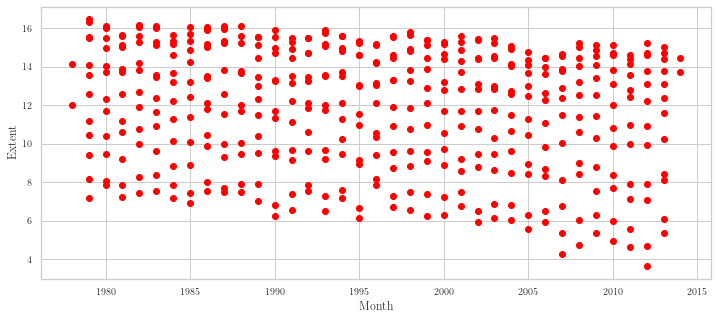

In [11]:
# We can easily clean the data now:
ice2 = ice[ice.data_type != '-9999']
print('shape:', ice2.shape)
# And repeat the plot
x = ice2.year
y = ice2.extent
plt.scatter(x, y, color = 'red')
plt.xlabel('Month')
plt.ylabel('Extent')

2) To compute the tendency for a given interval of time (month), we need to normalize the data.

The ``lmplot()`` function from the Seaborn module is intended for exploring linear relationships of different forms in multidimensional datesets. Input data must be in a Pandas ``DataFrame``. To plot them, we provide the predictor and response variable names along with the dataset

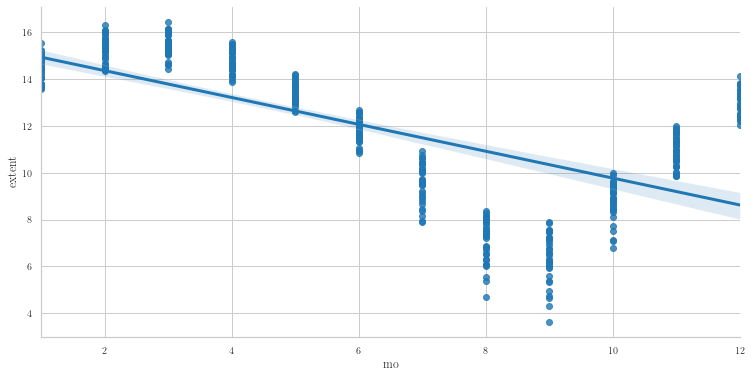

In [12]:
sns.lmplot(x = "mo", y = "extent", data = ice2, height = 5.2, aspect = 2);
plt.savefig("files/ch06/IceExtentCleanedByMonth.png", dpi = 300, bbox_inches = 'tight')

In [13]:
# Compute the mean for each month.
grouped = ice2.groupby('mo')
month_means = grouped.extent.mean()
month_variances = grouped.extent.var()
print('Means:', month_means)
print('Variances:',month_variances)

Means: mo
1     14.479429
2     15.298889
3     15.491714
4     14.766000
5     13.396000
6     11.860000
7      9.601143
8      7.122286
9      6.404857
10     8.809143
11    10.964722
12    13.059429
Name: extent, dtype: float64
Variances: mo
1     0.304906
2     0.295804
3     0.237209
4     0.215378
5     0.189901
6     0.247918
7     0.679175
8     0.824577
9     1.143902
10    0.630361
11    0.412511
12    0.284870
Name: extent, dtype: float64


We can compute the mean for that interval of time (using the period 1981 through 2010 for the mean extend) and we subtract it from the mean extend for that interval. This value must be converted to percent difference by dividing it by the 1981-2010 average and then multiplying by 100.

<ipython-input-14-cfcc9be34ed6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ice2.extent[ice2.mo == i+1] = 100*(ice2.extent[ice2.mo == i+1] - month_means[i+1])/month_means.mean()
/Users/santisegui/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
<ipython-input-14-cfcc9be34ed6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ice

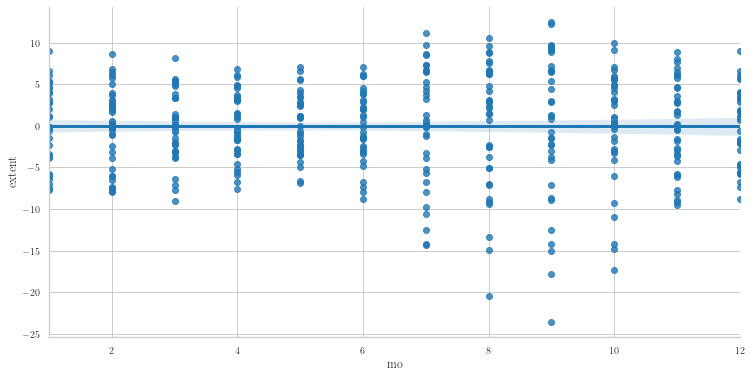

In [14]:
# Data normalization
for i in range(12):
    ice2.extent[ice2.mo == i+1] = 100*(ice2.extent[ice2.mo == i+1] - month_means[i+1])/month_means.mean()
    
sns.lmplot(x = "mo", y = "extent", data = ice2, height = 5.2, aspect = 2);
plt.savefig("files/ch06/IceExtentNormalizedByMonth.png", dpi = 300, bbox_inches = 'tight')

In [15]:
print('mean:', ice2.extent.mean())
print('var:', ice2.extent.var())

mean: -6.503486532875325e-15
var: 31.983239774968794


3) This values can be plotted for the entire time series or for particular months. 

Let us consider the entiere year

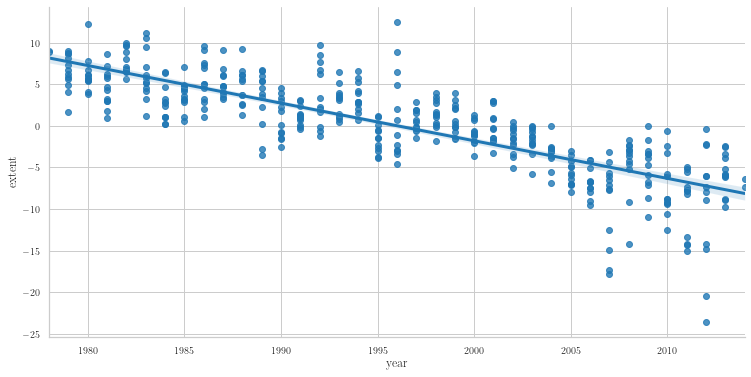

In [16]:
sns.lmplot(x = "year", y = "extent", data = ice2, height = 5.2, aspect = 2);
plt.savefig("files/ch06//IceExtentAllMonthsByYearlmplot.png", dpi = 300, bbox_inches = 'tight')

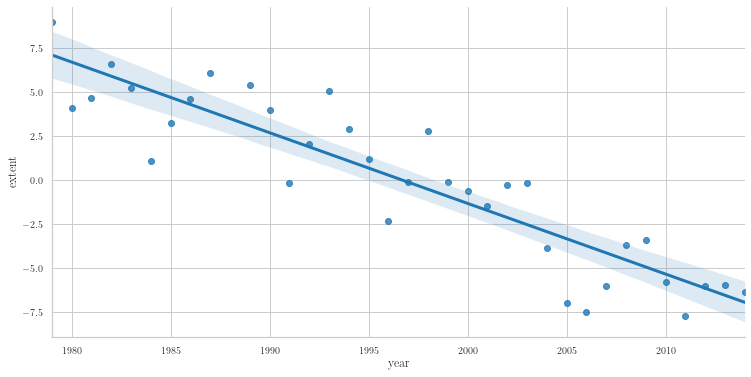

In [17]:
#For January
jan = ice2[ice2.mo == 1];
sns.lmplot(x = "year", y = "extent", data = jan, height = 5.2, aspect = 2);

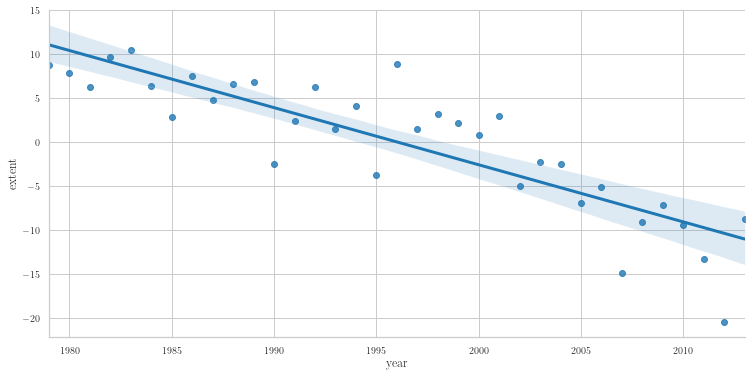

In [18]:
# For August
aug = ice2[ice2.mo == 8]
sns.lmplot(x = "year", y = "extent", data = aug, height = 5.2, aspect = 2);

In [19]:
# Calculates a Pearson correlation coefficient and the p-value for testing non-correlation.
import scipy.stats
scipy.stats.pearsonr(ice2.year.values, ice2.extent.values)

(-0.8183500709897176, 4.449231816871353e-103)

4) We can also compute the trend as a simple linear regression (OLS) and quantitatively evaluate it.

For that we use using **Scikit-learn**, library that provides a variety of both supervised and unsupervised machine learning techniques.
Scikit-learn provides an object-oriented interface centered around the concept of an Estimator. 
The <code>Estimator.fit</code> method sets the state of the estimator based on the training data. Usually, the data is comprised of a two-dimensional numpy array $X$ of shape <code>(n_samples, n_predictors)</code> that holds the so-called feature matrix and a one-dimensional numpy array $\textbf{y}$ that holds the responses. Some estimators allow the user to control the fitting behavior. 
For example, the <code>sklearn.linear_model.LinearRegression</code> estimator allows the user to specify whether or not to fit an intercept term. This is done by setting the corresponding constructor arguments of the estimator object.
During the fitting process, the state of the estimator is stored in instance attributes that have a trailing underscore ('_'). For example, the coefficients of a LinearRegression estimator are stored in the attribute coef_.

Estimators that can generate predictions provide a ``Estimator.predict`` method. 
In the case of regression, ``Estimator.predict`` will return the predicted regression values, $\hat{\textbf{y}}$. 

In [20]:
from sklearn.linear_model import LinearRegression

est = LinearRegression(fit_intercept = True)

x = ice2[['year']]
y = ice2[['extent']]

est.fit(x, y)

print("Coefficients:", est.coef_)
print("Intercept:", est.intercept_)

Coefficients: [[-0.45275459]]
Intercept: [903.71640207]


We can evaluate the model fitting by computing the mean squared error ($MSE$) and the coefficient of determination ($R^2$) of the model.
The coefficient $R^2$ is defined as $(1 - \textbf{u}/\textbf{v})$, where $\textbf{u}$ is the residual sum of squares $\sum (\textbf{y} - \hat{\textbf{y}})^2$ and $\textbf{v}$ is the regression sum of squares $\sum (\textbf{y} - \bar{\textbf{y}})^2$, where $\bar{\textbf{y}}$ is the mean.
The best possible score for $R^2$ is 1.0: lower values are worse.
These measures can provide a quantitative answer to the question we are facing: Is there a negative trend in the evolution of sea ice extent over recent years?

MSE: 10.539131639803518
R^2: 0.5067870382100239
var: extent    31.98324
dtype: float64


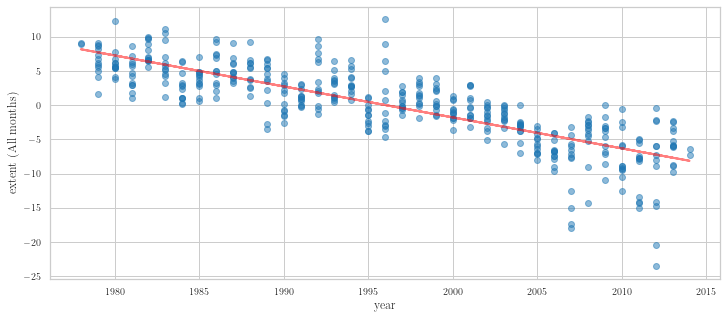

In [21]:
from sklearn import metrics

# Analysis for all months together.
x = ice2[['year']]
y = ice2[['extent']]
model = LinearRegression()
model.fit(x, y)
y_hat = model.predict(x)
plt.plot(x, y,'o', alpha = 0.5)
plt.plot(x, y_hat, 'r', alpha = 0.5)
plt.xlabel('year')
plt.ylabel('extent (All months)')
print("MSE:", metrics.mean_squared_error(y_hat, y))
print("R^2:", metrics.r2_score(y_hat, y))
print("var:", y.var())
plt.savefig("files/ch06/IceExtentLinearRegressionAllMonthsByYearPrediction.png", dpi = 300, bbox_inches = 'tight')

We can conclude that the data show a long-term negative trend in recent years.


MSE: 3.839516075286746
R^2: 0.781063604139622


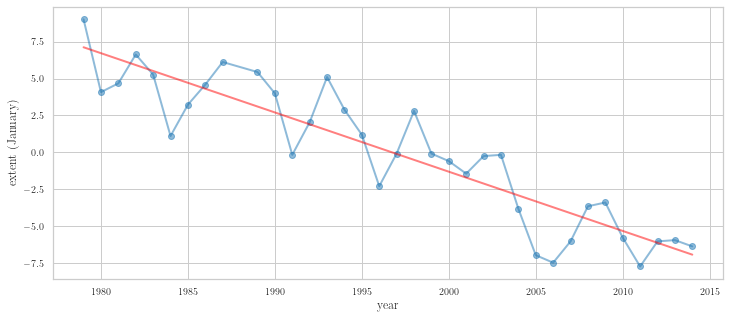

In [22]:
# Analysis for a particular month.
x = jan[['year']]
y = jan[['extent']]

model = LinearRegression()
model.fit(x, y)

y_hat = model.predict(x)

plt.figure()
plt.plot(x, y,'-o', alpha = 0.5)
plt.plot(x, y_hat, 'r', alpha = 0.5)
plt.xlabel('year')
plt.ylabel('extent (January)')

print("MSE:", metrics.mean_squared_error(y_hat, y))
print("R^2:", metrics.r2_score(y_hat, y))

5) We can also estimate the extent value for 2025. For that we use the function predict of the model.

In [23]:
X = np.array([2025]).reshape(-1,1)
y_hat = model.predict(X)
j = 1 # January
# Original value (before normalization)
y_hat = (y_hat*month_means.mean()/100) + month_means[j]
print("Prediction of extent for January 2025 (in millions of square km):", y_hat)

Prediction of extent for January 2025 (in millions of square km): [[13.14449923]]


## Polynomial Regression

Despite its name, linear regression can be used to fit non-linear functions. A linear regression model is linear in the model parameters, not necessarily in the predictors. If you add non-linear transformations of your predictors to the linear regression model, the model will be non-linear in the predictors.

A very popular non-linear regression technique is *Polynomial Regression*, a technique which models the relationship between the response and the predictors as an n-th order polynomial. 

$$ \textbf{y} = a_1 \phi(\textbf{x}_1) + \dots + a_m \phi(\textbf{x}_m) $$

The higher the order of the polynomial the more "wigglier" functions you can fit. 

Using higher order polynomial comes at a price: **computational complexity** and **overfitting**. Overfitting refers to a situation in which the model fits the idiosyncrasies of the training data and loses the ability to generalize from the seen to predict the unseen.

### Practical case 2: Housing Data

The Boston housing data set provides records measurements of 13 attributes of housing markets around Boston, as well as the median price. We want to predict the price of a market given a set of attributes.



To start with we load and visualize the data.

In [24]:
from sklearn import datasets
boston = datasets.load_boston()
X_boston,y_boston = boston.data, boston.target
print('Shape of data:', X_boston.shape, y_boston.shape)

Shape of data: (506, 13) (506,)


In [25]:
print('Keys:', boston.keys())
print('Feature names:',boston.feature_names)
print(boston.DESCR)

Keys: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
Feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances 

Text(0, 0.5, 'count')

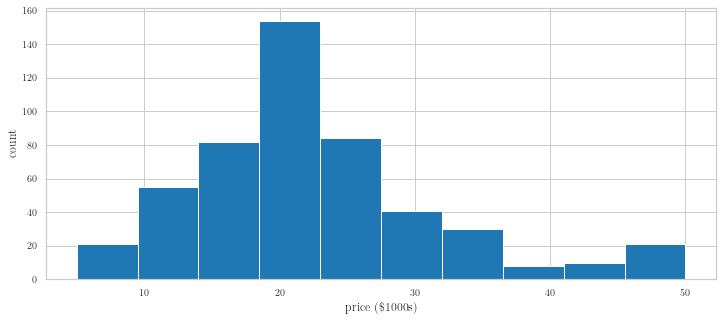

In [26]:
# Histogram of prices:
plt.hist(y_boston) 
plt.xlabel('price (\$1000s)')
plt.ylabel('count')

### Visualizations

We first consider the task of predicting median house values in the Boston area using as the predictor one of the attributes, for instance, LSTAT, defined as the "proportion of lower status of the population".

Seaborn visualization can be used to show this linear relationships easily:

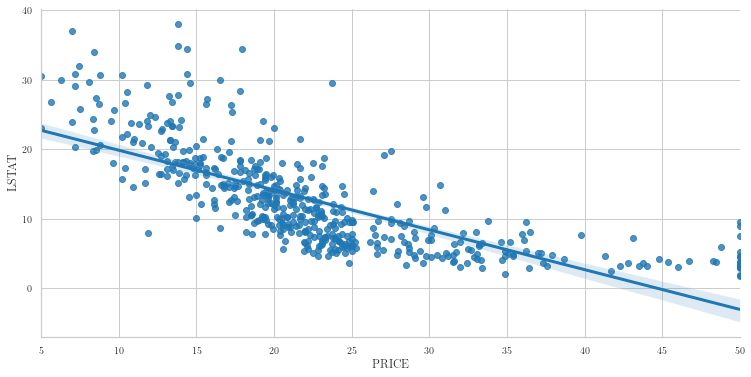

In [27]:
# Visualization of the relations between price and LSTAT
df_boston = pd.DataFrame(boston.data, columns = boston.feature_names)
df_boston['PRICE'] = boston.target
sns.lmplot(x = "PRICE", y =  "LSTAT", data = df_boston, height = 5.2, aspect = 2);
plt.savefig("files/ch06/lmplotBostonLSTAT.png", dpi = 300, bbox_inches = 'tight')

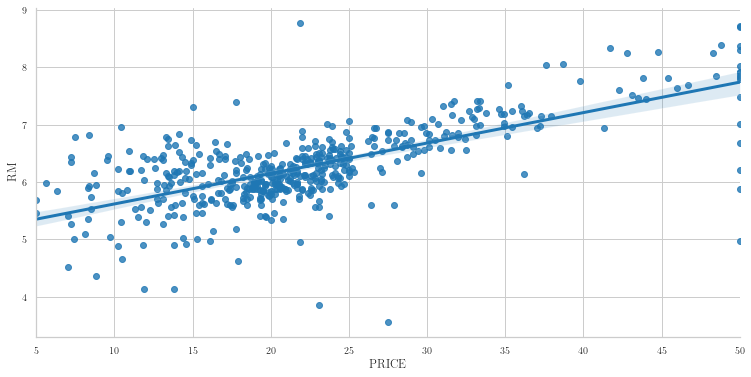

In [28]:
# Visualization of the relations between price and RM
sns.lmplot(x = "PRICE",y = "RM", data = df_boston, height = 5.2, aspect = 2);

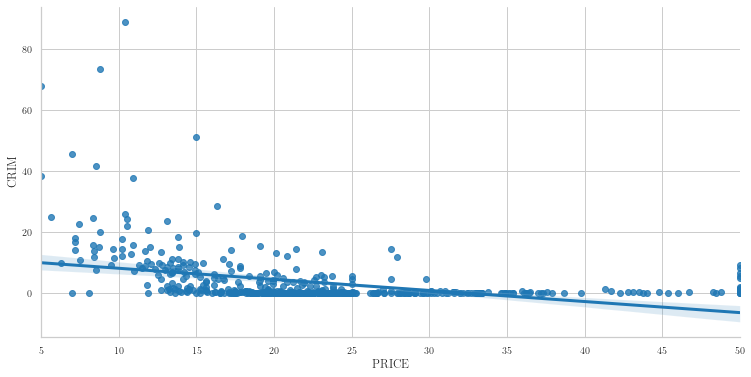

In [29]:
# Visualization of the relations between price and CRIM
sns.lmplot(x = "PRICE", y = "CRIM", data = df_boston, height = 5.2, aspect = 2);

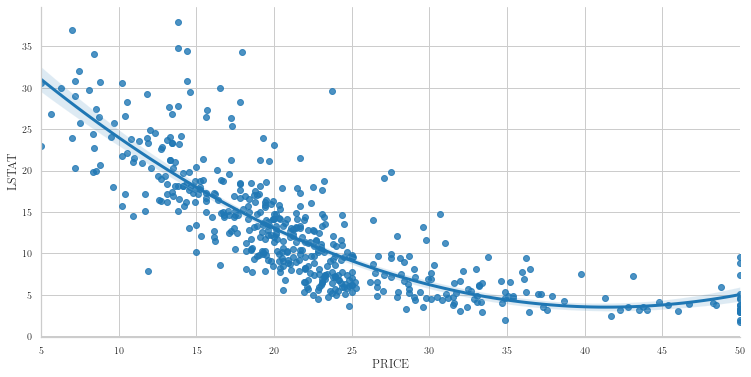

In [30]:
sns.lmplot(x = "PRICE", y = "LSTAT", data = df_boston, order = 2, height = 5.2, aspect = 2);
plt.savefig("files/ch06/lmplotBostonLSTAT_order2.png", dpi = 300, bbox_inches = 'tight')

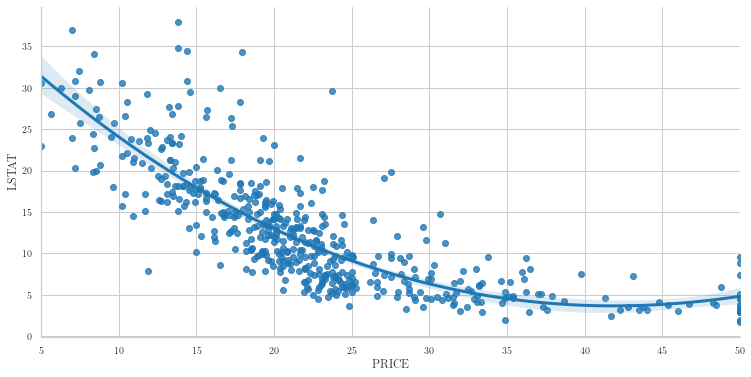

In [31]:
sns.lmplot(x = "PRICE",y = "LSTAT", data = df_boston, order = 3, height = 5.2, aspect = 2);
plt.savefig("files/ch06/lmplotBostonLSTATorder3.png", dpi = 300, bbox_inches = 'tight')

### Heatmap

We can also use corrplot function for plotting a diagonal correlation matrix.

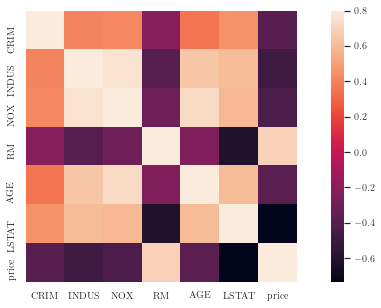

In [32]:
# Draw a heatmap 
indexes = [0, 2, 4, 5, 6, 12] #To plot just some of the variables
df2 = pd.DataFrame(boston.data[:,indexes], columns = boston.feature_names[indexes])
df2['price'] = boston.target
corrmat = df2.corr()
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax = .8, square = True)
plt.savefig("files/ch06/corrplot.png", dpi = 300, bbox_inches = 'tight')


Using correlaton matrix heatmap we can observe that "RM" and "LSTAT" are the variables more correlated with "Price".

### Scatter plot

Let's explore multiple variables with scatter plot
The scatter plot of Pandas is a grid of plots of multiple varaibles one against the other, showing the relationship of each variable to the others.

For the sake of visualization, we choose 3 from the set of 13 variables (LSTAT, AGE, RM):

In [33]:
print(boston.feature_names)
indexes = [5, 6, 12] # 3 of the 13 variables: LSTAT, AGE, RM.
print(boston.feature_names[indexes])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
['RM' 'AGE' 'LSTAT']


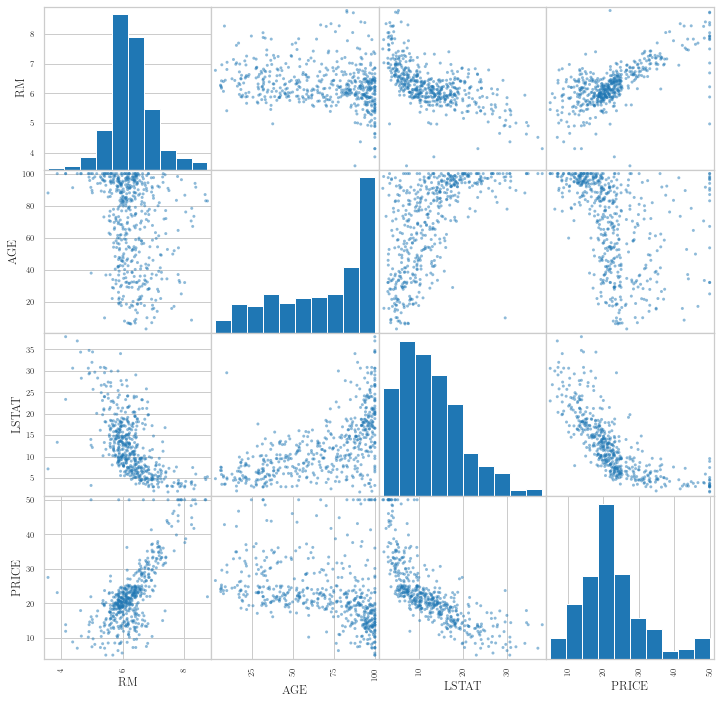

In [34]:
from pandas.plotting import scatter_matrix

indexes = [5, 6, 12]
df2 = pd.DataFrame(boston.data[:,indexes], columns = boston.feature_names[indexes])
df2['PRICE'] = boston.target
scatter_matrix(df2, figsize = (12.0, 12.0))  
plt.savefig("files/ch06/scatterplotBoston.png", dpi = 300, bbox_inches = 'tight')

### Predictions

Let's make predictions. Evaluation on new samples using Scikit-learn.
We will split the data into training set and test set:

In [35]:
from sklearn import linear_model
train_size = X_boston.shape[0]//2
X_train = X_boston[:train_size]
X_test = X_boston[train_size:]
y_train = y_boston[:train_size]
y_test = y_boston[train_size:]
print('Training and testing set sizes', X_train.shape, X_test.shape)

regr_boston = LinearRegression()
regr_boston.fit(X_train, y_train) 
print('Coeff and intercept:', regr_boston.coef_, regr_boston.intercept_)

# Best possible score is 1.0, lower values are worse.
print('Training Score:', regr_boston.score(X_train, y_train) )
print('Testing Score:', regr_boston.score(X_test, y_test) )
print('Training MSE: ', np.mean((regr_boston.predict(X_train) - y_train)**2))
print('Testing MSE: ', np.mean((regr_boston.predict(X_test) - y_test)**2))

Training and testing set sizes (253, 13) (253, 13)
Coeff and intercept: [ 1.20133313  0.02449686  0.00999508  0.42548672 -8.44272332  8.87767164
 -0.04850422 -1.11980855  0.20377571 -0.01597724 -0.65974775  0.01777057
 -0.11480104] -10.017430582944893
Training Score: 0.8557827200735684
Testing Score: -2.2527343423924138
Training MSE:  9.987517325463738
Testing MSE:  303.43686292657895


We can see that all the coefficients obtained are different from zero, meaning that no variable is discarded.
Next, we try to build a sparse model to predict the price using the most important factors and discarding the non-informative ones. To do this, we can create a LASSO regressor, forcing zero coefficients.

## Sparse models

Often, in real problems, there are uninformative variables in the data which prevent proper modeling of the problem and thus, the building of a correct regression model. In such cases, a feature selection process is crucial to select only the informative features and discard non-informative ones. This can be achieved by sparse methods which use a penalization approach, such as *LASSO* (least absolute shrinkage and selection operator) to set some model coefficients to zero (thereby discarding those variables). Sparsity can be seen as an application of Occam’s razor: prefer simpler models to complex ones.


In [36]:
# Create a Lasso regressor
regr_lasso = linear_model.Lasso(alpha=.3)
regr_lasso.fit(X_train, y_train) 
print('Coeff and intercept:', regr_lasso.coef_,  regr_lasso.intercept_)
# Are the coeficients now sparse?
print('Training Score:', regr_lasso.score(X_train, y_train))
print('Testing Score:', regr_lasso.score(X_test, y_test))
# Is the score almost the same?
print('Training MSE: ', np.mean((regr_lasso.predict(X_train) - y_train)**2))
print('Testing MSE: ', np.mean((regr_lasso.predict(X_test) - y_test)**2))

Coeff and intercept: [ 0.          0.01996512 -0.          0.         -0.          7.69894744
 -0.03444803 -0.79380636  0.0735163  -0.0143421  -0.66768539  0.01547437
 -0.22181817] -6.183241836148394
Training Score: 0.8449992039829642
Testing Score: 0.501127529021216
Training MSE:  10.73431100954422
Testing MSE:  46.538168094875665


It can now be seen that the result of the model fitting for a set of sparse coefficients is much better than before (using all the variables), with the testing score increasing from -2.24 to 0.5. This demonstrates that four of the initial variables are not important for the prediction and in fact they confuse the regressor.

In [37]:
print(boston.data.shape)
print(boston.target.shape)
print(boston.feature_names)
print("max, min and mean:", np.max(boston.target), np.min(boston.target), np.mean(boston.target))

(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
max, min and mean: 50.0 5.0 22.532806324110677


In [38]:
indexes_non_selected = [0, 2, 3, 4]
print('Non important variable:', boston.feature_names[indexes_non_selected])
most_important_index=[5]
print('Most important variable:', boston.feature_names[most_important_index])

Non important variable: ['CRIM' 'INDUS' 'CHAS' 'NOX']
Most important variable: ['RM']


In [39]:
ind = np.argsort(np.abs(regr_lasso.coef_))
print('Order variable (from less to more important):', boston.feature_names[ind])

Order variable (from less to more important): ['CRIM' 'INDUS' 'CHAS' 'NOX' 'TAX' 'B' 'ZN' 'AGE' 'RAD' 'LSTAT' 'PTRATIO'
 'DIS' 'RM']


We can select the most important features with sklearn:

In [40]:
import sklearn.feature_selection as fs 
selector = fs.SelectKBest(score_func = fs.f_regression, k = 5)
selector.fit_transform(X_train, y_train)
print('Selected features:', zip(selector.get_support(), boston.feature_names)) # Show the selected features

Selected features: <zip object at 0x7f7f13859fc0>


The set of selected features is now different, since the criterion has changed. However, three of the most important features are among them: 'RM', 'PTRATIO' and 'LSTAT'.

Let's evaluate the predictions.

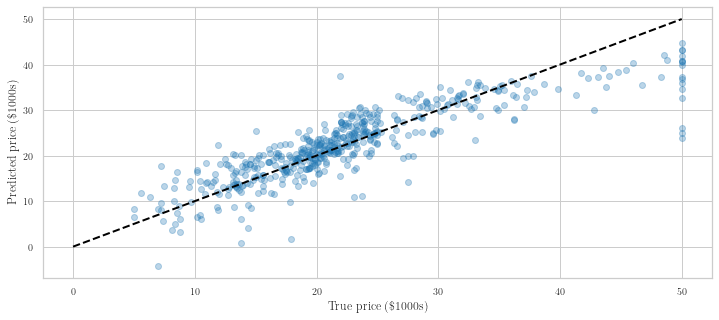

In [41]:
# Visualization of target and predicted responses
clf = LinearRegression()
clf.fit(boston.data, boston.target)
predicted = clf.predict(boston.data)
plt.scatter(boston.target, predicted, alpha = 0.3)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price (\$1000s)')
plt.ylabel('Predicted price (\$1000s)')
plt.savefig("files/ch06/relationTruePredictedPrices.png", dpi = 300, bbox_inches = 'tight')

The model seem to be a good fitting except for the more expensive houses.

Model evaluation:

In [42]:
clf.score(boston.data, boston.target)  # Best possible score is 1.0, lower values are worse.

0.7406426641094095

In [43]:
# Score using a single feature
regr_feat1 = LinearRegression()
for i in np.arange(13):
    feat1 = X_train[:,i:i+1]
    regr_feat1.fit(feat1, y_train)    
    print('Feature:', boston.feature_names[i])
    print('Score:', regr_feat1.score(feat1, y_train) )

Feature: CRIM
Score: 0.05024843836202264
Feature: ZN
Score: 0.10206594240694711
Feature: INDUS
Score: 0.13068434569181497
Feature: CHAS
Score: 0.00018610373661331892
Feature: NOX
Score: 0.11130139266941119
Feature: RM
Score: 0.7699004053318655
Feature: AGE
Score: 0.11300215206715913
Feature: DIS
Score: 0.018087821597697507
Feature: RAD
Score: 0.0015003535946076507
Feature: TAX
Score: 0.05512205417475469
Feature: PTRATIO
Score: 0.13721073435814335
Feature: B
Score: 0.0463878641534512
Feature: LSTAT
Score: 0.5035503901281464


### Transformer:

Remember that sometimes Standarization is useful.

There is a special type of ``Estimator`` called ``Transformer`` which transforms the input data -- e.g. selects a subset of the features or extracts new features based on the original ones. One transformer that we will use here is ``sklearn.preprocessing.StandardScaler``. This transformer centers each predictor in ``X`` to have zero mean and unit variance:

In [44]:
from sklearn.preprocessing import StandardScaler
# Create the transformer StandardScaler for data and target
scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(y_train.reshape(-1,1))

print("\nBefore transformation:")
print("max, min and mean:", np.max(y_train), np.min(y_train), np.mean(y_train))

# Normalization of train and test data using mean and variance of the training
X_train = scalerX.transform(X_train)
y_train = scalery.transform(y_train.reshape(-1,1))
X_test = scalerX.transform(X_test)
y_test = scalery.transform(y_test.reshape(-1,1))

print("\nAfter transformation:")
print("max, min and mean:", np.max(y_train), np.min(y_train), np.mean(y_train))


Before transformation:
max, min and mean: 50.0 11.8 24.307509881422927

After transformation:
max, min and mean: 3.0873514853387736 -1.5029714532177498 -2.808469311304744e-16


### Statistical evaluation

The ``statsmodels`` package provides several different classes that provide different options for linear regression. Getting started with linear regression is quite straightforward with the OLS module.

We can perform the regression of the predictor on the response, using the ``sm.OLS`` class and its initialization ``OLS(y, X)`` method. This method takes as an input two array-like objects: $X$ and $\textbf{y}$. In general, $X$ will either be a numpy array or a pandas data frame with shape ``(n, p)`` where $n$ is the number of data points and $p$ is the number of predictors. $\textbf{y}$ is either a one-dimensional numpy array or a pandas series of length $n$.

In [45]:
import statsmodels.api as sm
X2 = X_boston[:,12] # Let's use column 12 (LSTAT) to perform a regression:
X12 = sm.add_constant(X2)  # Adds a constant term to the predictor
est = sm.OLS(y_boston, X2) # Creates an object OLS estimator
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.449
Model:                            OLS   Adj. R-squared (uncentered):              0.448
Method:                 Least Squares   F-statistic:                              410.9
Date:                Sun, 26 Sep 2021   Prob (F-statistic):                    2.71e-67
Time:                        18:50:36   Log-Likelihood:                         -2182.4
No. Observations:                 506   AIC:                                      4367.
Df Residuals:                     505   BIC:                                      4371.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1221      0.055     20.271      0.000       1.013       1.231
==============================================================================
Omnibus:                        1.113   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                1.051
Skew:                           0.112   Prob(JB):                        0.591
Kurtosis:                       3.009   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Logistic Regresion (Scikit-learn)

**Logistic regression** or logit regression is a type of probabilistic statistical classification model. It is also used to predict a binary response from a binary predictor, used for predicting the outcome of a categorical dependent variable (i.e., a class label) based on one or more predictor variables (features). 

(Source: *Wikipedia*)

The logistic function is:

$$ f(x) = \frac{1}{1+e^{- \lambda x}}$$

The logistic function is useful because it can take an input with any value from negative infinity to positive infinity, whereas the output  is confined to values between 0 and 1 and hence is interpretable as a probability.

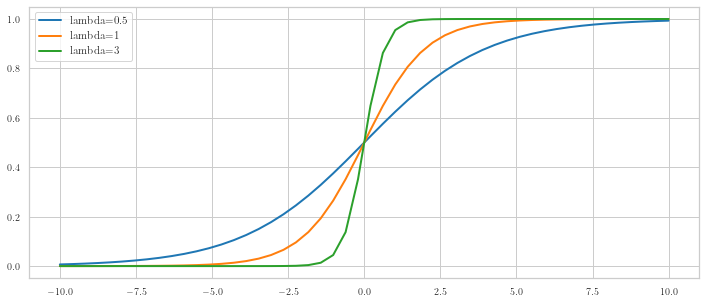

In [46]:
def logist(x,l):
    return 1/(1+np.exp(-l*x))

x = np.linspace(-10, 10) # 50 points equally spaced from -10 to 10
t = logist(x, 0.5)
y = logist(x, 1)
z = logist(x, 3)
plt.plot(x, t, label = 'lambda=0.5')
plt.plot(x, y, label = 'lambda=1')
plt.plot(x, z, label = 'lambda=3')
plt.legend(loc = 'upper left')
plt.savefig("files/ch06/LogisticRegression.png", dpi = 300, bbox_inches = 'tight')

In [47]:
def lr_model(x):
    return 1 / (1 + np.exp(-x))

<ipython-input-47-789dd981ec14>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
No handles with labels found to put in legend.


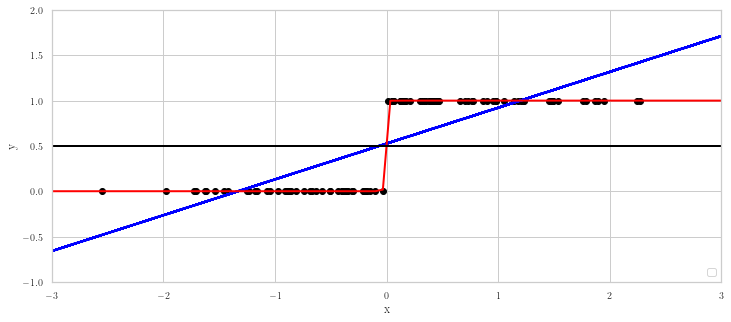

In [48]:
xmin, xmax = -10, 10
np.random.seed(0)
X = np.random.normal(size = 100) 

y = (X > 0).astype(float) 
X = X[:, np.newaxis] 

# Linear Regression:
ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, color = 'blue', linewidth = 2)

# Logistic Regression:
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# Drawing:
X_test = np.linspace(-10, 10, 300)
loss = lr_model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color = 'red', linewidth = 2)

plt.axhline(0.5, color = 'black')

plt.scatter(X, y, color = 'black')

plt.legend(loc = 'lower right')
plt.ylabel('y')
plt.xlabel('x')

plt.ylim(-1, 2)
plt.xlim(-3, 3)

plt.savefig("files/ch06/LinearvsLR.png", dpi = 300, bbox_inches = 'tight')

### Practical case 3: Winning or Losing Football Team

We want to predict victory or defeat in a football match when we are given the number of goals a team scores.
To do this we consider the set of results of the football matches from the Spanish league and we build a classification model with it. We follow the steps:
+ Read this file in a pandas DataFrame: http://www.football-data.co.uk/mmz4281/1213/SP1.csv
+ Select these columns in a new DataFrame: 'HomeTeam','AwayTeam', 'FTHG', 'FTAG', 'FTR'. (FTHG: Home team goals, FTAG: Away team goals, FTR: H=Home Win, D=Draw, A=Away Win)
+ Visualize a scatter plot of FTHG versus FTAG.
+ Built a $X$ 1-d predictor with all scores and a $y$ binary variable indicating win or loss.
+ Compute and visualize a logistic regression. 
+ Which is the cut value?

In [49]:
# Season 2012/2013
file = 'files/ch06/SP1.csv' # file = 'http://www.football-data.co.uk/mmz4281/1213/SP1.csv'
data_football = pd.read_csv(file)
s = data_football[['HomeTeam','AwayTeam', 'FTHG', 'FTAG', 'FTR']]

In [50]:
s.head() # (H=Home Win, D=Draw, A=Away Win)

,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,Celta,Malaga,0,1,A
1,Mallorca,Espanol,2,1,H
2,Sevilla,Getafe,2,1,H
3,Ath Bilbao,Betis,3,5,A
4,Barcelona,Sociedad,5,1,H


Can we predict if we have a win or loss if we are given a score?

Text(0, 0.5, 'Away team goals (FTAG)')

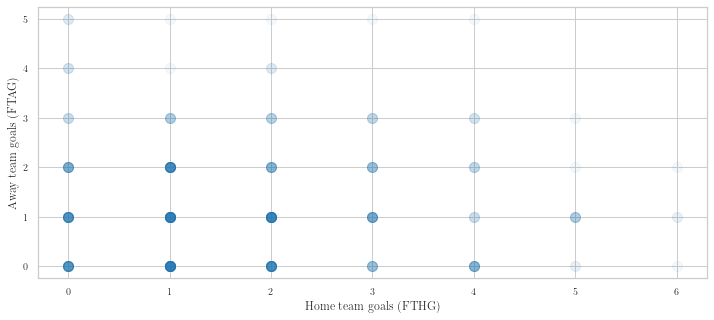

In [51]:
# Visualization with scatter the number of goals
plt.scatter(s.FTHG, s.FTAG, s = 100, alpha = 0.05) 
# s, size of the points, alpha, blending value, between 0 (transparent) and 1 (opaque).
plt.xlabel('Home team goals (FTHG)')
plt.ylabel('Away team goals (FTAG)')

In [52]:
# Create two extra columns containing 'W' the number of goals of the winner and 'L' the number of goals of the losser
def my_f1(row):
    return max(row['FTHG'], row['FTAG'])

def my_f2(row):
    return min(row['FTHG'], row['FTAG'])

# Add 2 new columns to the panda:
s.loc[:,'W'] = s.apply(my_f1, axis = 1)
s.loc[:,'L'] = s.apply(my_f2, axis = 1)


/Users/santisegui/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/santisegui/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [53]:
s.info()
s.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   HomeTeam  380 non-null    object
 1   AwayTeam  380 non-null    object
 2   FTHG      380 non-null    int64 
 3   FTAG      380 non-null    int64 
 4   FTR       380 non-null    object
 5   W         380 non-null    int64 
 6   L         380 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 20.9+ KB


,HomeTeam,AwayTeam,FTHG,FTAG,FTR,W,L
0,Celta,Malaga,0,1,A,1,0
1,Mallorca,Espanol,2,1,H,2,1
2,Sevilla,Getafe,2,1,H,2,1
3,Ath Bilbao,Betis,3,5,A,5,3
4,Barcelona,Sociedad,5,1,H,5,1


In [54]:
# Create the data and target
import numpy as np
x1 = s['W'].values 
y1 = np.ones(len(x1), dtype = int)
x2 = s['L'].values 
y2 = np.zeros(len(x2), dtype = int)

x = np.concatenate([x1, x2])
x = x[:, np.newaxis]
y = np.concatenate([y1, y2])


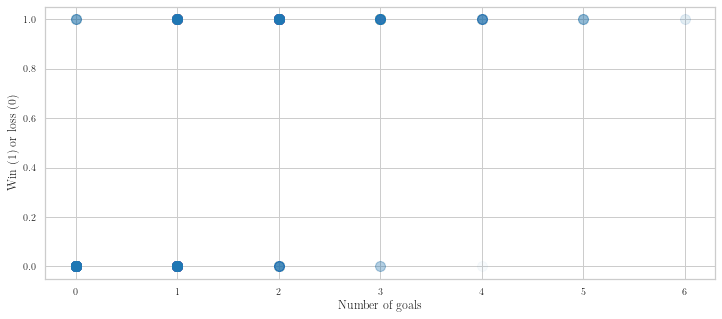

In [55]:
# Plot the data 
plt.scatter(x, y, s = 100, alpha = 0.03)
plt.xlabel('Number of goals')
plt.ylabel('Win (1) or loss (0)')
plt.savefig("files/ch06/scatterLossWin.png", dpi = 300, bbox_inches = 'tight')

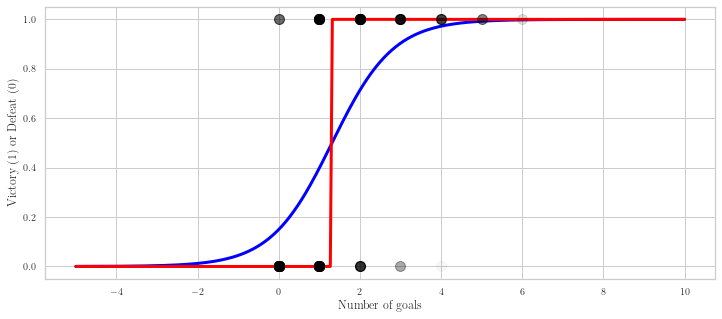

In [56]:
# Fitting of a Logistic Regression and prediction using the model:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x, y)

X_test = np.linspace(-5, 10, 300)

loss = lr_model(X_test * logreg.coef_ + logreg.intercept_).ravel()

X_test2 = X_test[:, np.newaxis]
losspred = logreg.predict(X_test2)

plt.scatter(x.ravel(), y, color = 'black', s = 100, zorder = 20, alpha = 0.03)
plt.plot(X_test, loss, color = 'blue', linewidth = 3)
plt.plot(X_test, losspred, color = 'red', linewidth = 3)
plt.xlabel('Number of goals')
plt.ylabel('Victory (1) or Defeat (0)')
plt.savefig("files/ch06/logregPrediction.png", dpi = 300, bbox_inches = 'tight')

With this information we can estimate that the cut off value is 1. This means that a team has to score more than one goal to win.